In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rcParams["figure.figsize"] = (10, 8)

try :
    import os
    os.mkdir("images")
except:
    pass

In [8]:
#import elekin as ek
def get_theta(eta):
    return 2*np.arctan(np.exp(-eta))

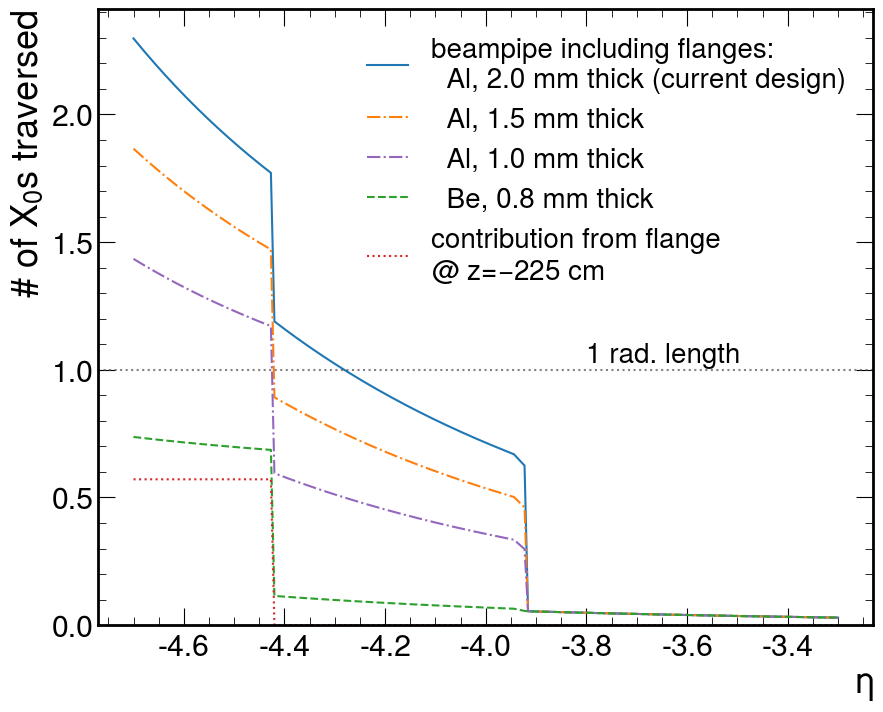

In [44]:

z=np.array((0,   -80,   -80.01, -225, -464.5))
IR=np.array((3.1,  3.1,   3.1,     3.85, 4.861))
thickness=np.array([0.0762]*2+[.2, .2, .2])
#fig, axs = plt.subplots(2,1)
def rad_plot(z, IR, thickness, X0cutoff, **arg):
    for isOuter in 0,1:
        etas=[]
        zs=[]
        X0s=[]
        for eta in np.linspace(-4.7, -3.3, 201):
            m=-np.abs(np.tan(get_theta(eta)))
            for i in range(len(z)-1):
                z1=z[i]
                z2=z[i+1]
                r1=IR[i]+isOuter*thickness[i]
                r2=IR[i+1]+isOuter*thickness[i+1]

                #r==abs(tan(theta))*z
                #(r-r2)*(z1-z2)/(r1-r2)==(z-z2)

                zint=(r2*z1 - r1*z2)/(-r1 + r2 + m*z1 - m*z2)
                if zint<z1 and zint>z2:
                    break
            etas.append(eta)
            zs.append(zint)
            X0s.append(8.897 if zint<X0cutoff else 35.28)
        zs=np.array(zs)
        etas=np.array(etas)      
        if isOuter:
            zs_outer=zs
        else:
            zs_inner=zs
    m=abs(np.tan(get_theta(etas)))
    flange_contribution = (m>4.08/225)*(m<5.4/225)*(2.54*2)/8.897
    plt.plot(etas,np.subtract(zs_inner,zs_outer)/X0s+flange_contribution, **arg)
    #axs[1].plot(etas, zs)

rad_plot(z=np.array((0,-80,-80.01,-225, -464.5)),
    IR=np.array((3.1,3.1,3.1,3.85, 4.861)),
    thickness=np.array([0.0762]*2+[.2, .2, .2]), X0cutoff=-80,
        label='beampipe including flanges:\n  Al, 2.0 mm thick (current design)')
rad_plot(z=np.array((0,-80,-80.01,-225, -464.5)),
    IR=np.array((3.1,3.1,3.1,3.85, 4.861)),
    thickness=np.array([0.0762]*2+[.15, .15, .15]), X0cutoff=-80,
        label = "  Al, 1.5 mm thick", ls='-.')
rad_plot(z=np.array((0,-80,-80.01,-225, -464.5)),
    IR=np.array((3.1,3.1,3.1,3.85, 4.861)),
    thickness=np.array([0.0762]*2+[.10, .10, .10]), X0cutoff=-80,
        label = "  Al, 1.0 mm thick", ls='-.', color='tab:purple')
rad_plot(z=np.array((0,-80,-80.01,-225, -464.5)),
    IR=np.array((3.1,3.1,3.1,3.85, 4.861)),
    thickness=np.array([0.0762]*5), X0cutoff=-800, 
         label="  Be, 0.8 mm thick", ls="--")
rad_plot(z=np.array((0,-80,-80.01,-225, -464.5)),
    IR=np.array((3.1,3.1,3.1,3.85, 4.861)),
    thickness=np.array([0.00001]*5), X0cutoff=-800, 
         label='contribution from flange\n@ z=$-$225 cm', ls=':')

plt.ylabel("# of $X_0$s traversed")
plt.ylim(0)
plt.xlabel("$\eta$")
#plt.ylim(0)

plt.axhline(1.0, color='0.3', ls=':', alpha=0.7)
plt.text(-3.8, 1.03, "1 rad. length", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("images/proposed_beampipe.pdf")

In [ ]:
mineta=-4.71; maxeta=-3.3
eta=np.linspace(mineta, maxeta, int((maxeta-mineta)/.05+2))
y={}
for tag in "beampipe_and_flanges_only", "flange_-120cm_only", "flange_-270cm_only":
    y[tag]= np.array([rads[(tag,int(i*20)/20)][-1] for i in eta])

#flanges_only=y["flange_-120cm_only"]+y["flange_-270cm_only"]
flanges_only=y["flange_-270cm_only"]

air=np.min(flanges_only)
flanges_only-=air#remove the air
y_current = y["beampipe_and_flanges_only"]-air-y["flange_-120cm_only"]
beampipe_no_flanges=y_current - flanges_only

X0_Be=35.28
X0_Al=8.897

print(X0_Al/X0_Be)

eta_transition=-3.97
s=(1.5/2.0)
y_new_thin_Al=beampipe_no_flanges*(s*(eta<eta_transition)+1*(eta>=eta_transition))+flanges_only


s=X0_Al/X0_Be*(0.76/2.0)
y_new_thinner_Be=beampipe_no_flanges*(s*(eta<eta_transition)+1*(eta>=eta_transition))+flanges_only


plt.plot(eta,y_current, label='beampipe including flanges:\n  Al, 2.0 mm thick (current design)')
plt.plot(eta,y_new_thin_Al, label='  Al, 1.5 mm thickness', ls='-.')

#smooth out notch caused by transition between the recalculated Beryllium and the real Beryllium in the model
slc=(eta>-3.5)|(eta<-4.0)
plt.plot(eta[slc],y_new_thinner_Be[slc], label='  Be, 0.8 mm thickness', ls='--')
plt.plot(eta,flanges_only, label='contribution from flange @ z=-270 cm', ls=':')

#plt.text(-4.75, 0.07, 'flange at\nz=$-$270 cm', color='tab:red', fontsize=14)
#plt.text(-4.15, 0.07, 'flange at\nz=$-$120 cm', color='tab:red', fontsize=20)

plt.plot()
plt.ylabel("# of $X_0$s traversed")
plt.ylim(0)
plt.xlabel("$\eta$")
#plt.ylim(0)

plt.axhline(1.0, color='0.3', ls=':', alpha=0.7)
plt.text(-3.8, 1.03, "1 rad. length", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("images/proposed_beampipe.pdf")